In [38]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=125832 sha256=9853c509dd1d638e06afa932506474f07b89eec5579c4375b1a6aafb538470ee
  Stored in directory: /tmp/pip-ephem-wheel-cache-mqnzunv4/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
import straph.paths.meta_walks as mw
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "sigmasv_nodes-simple.sg",
                      path_links=path_directory + "sigmasv_links-simple.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  4
Nb of segmented links :  7.0
Nb of event times :  7


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


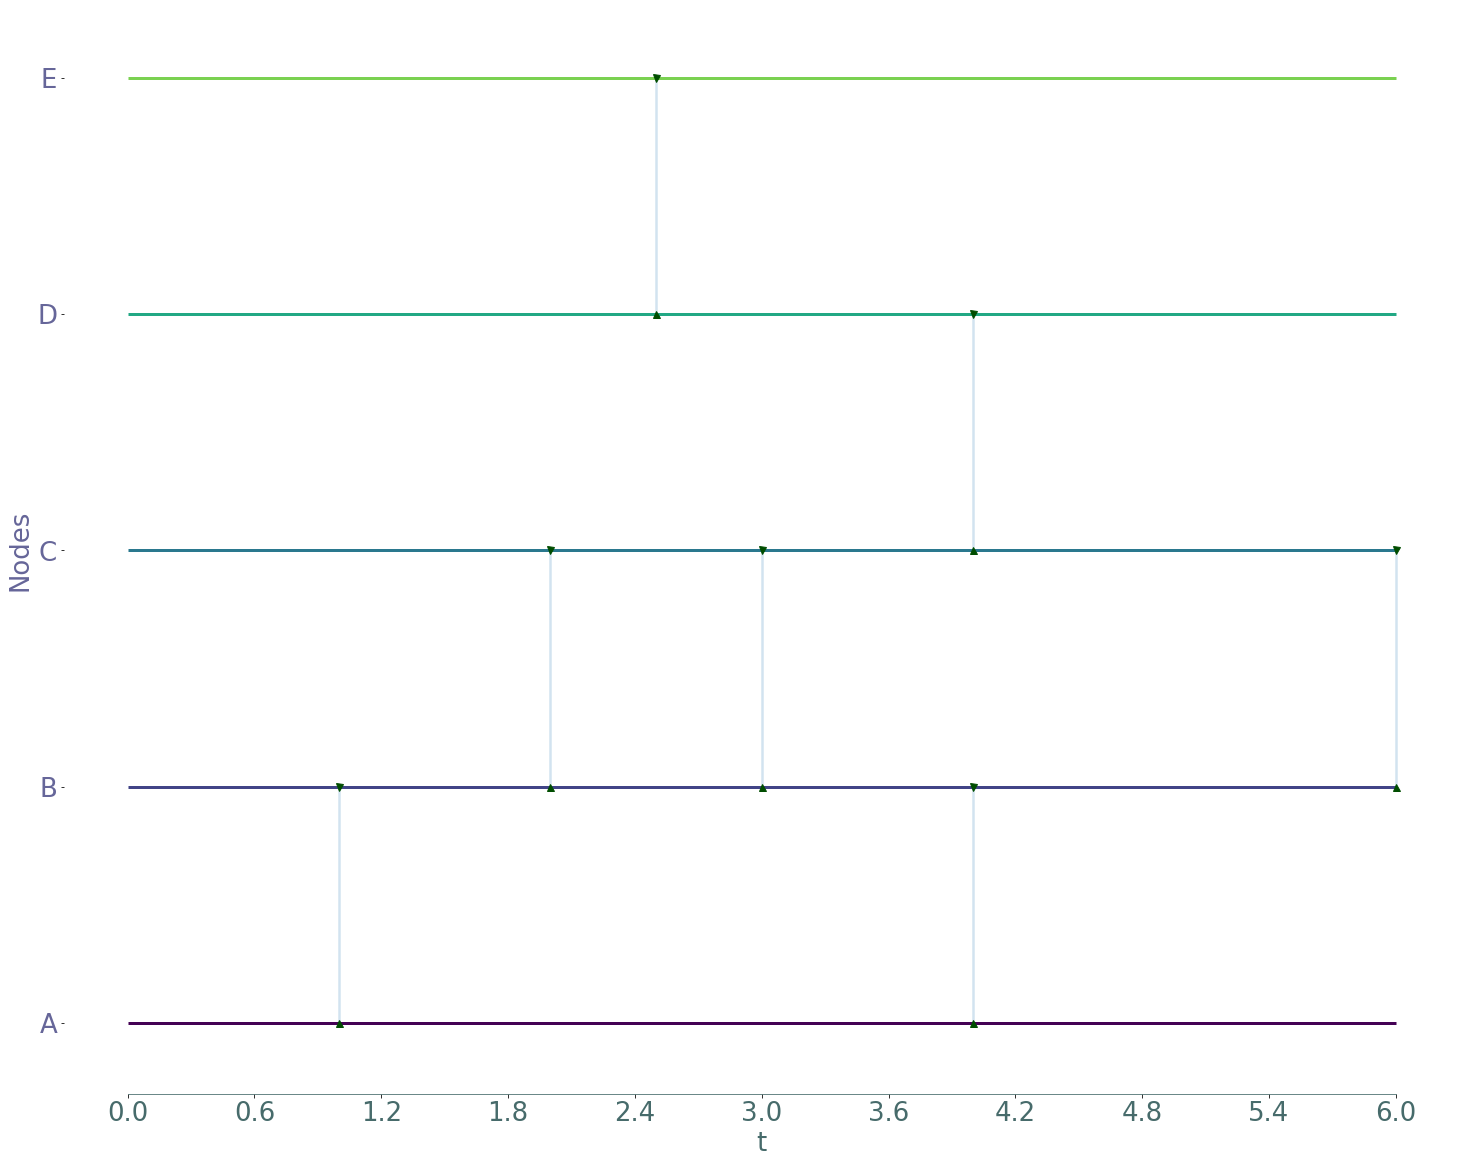

In [2]:
S.plot()

In [3]:
events, events_reverse = bt.events_dic(S)

In [4]:
link_ind = bt.link_index(S)
neighbors, neighbors_inv = bt.neighbors_direct(S)
unt = bt.until(S, events, events_reverse)

In [5]:
node = 0

In [6]:
import operator
import networkx as nx

b = operator.lt

In [7]:
pre, cur_best, opt_walk = bt.dijkstra_directed_dis_gen(S, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt, b, mw.Metawalk.co_short)


In [8]:
pre, cur_best, opt_walk = bt.ford_bellman_directed_gen_dis(S, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt, b, mw.Metawalk.co_short)


In [9]:
cur_best[4]

{0.0: inf, 1.0: inf, 2.0: inf, 2.5: inf, 3.0: inf, 4.0: inf, 6.0: inf}

In [10]:
cur_best2[4]

NameError: name 'cur_best2' is not defined

In [11]:
G = bt.predecessor_graph_dis_gen(S, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)


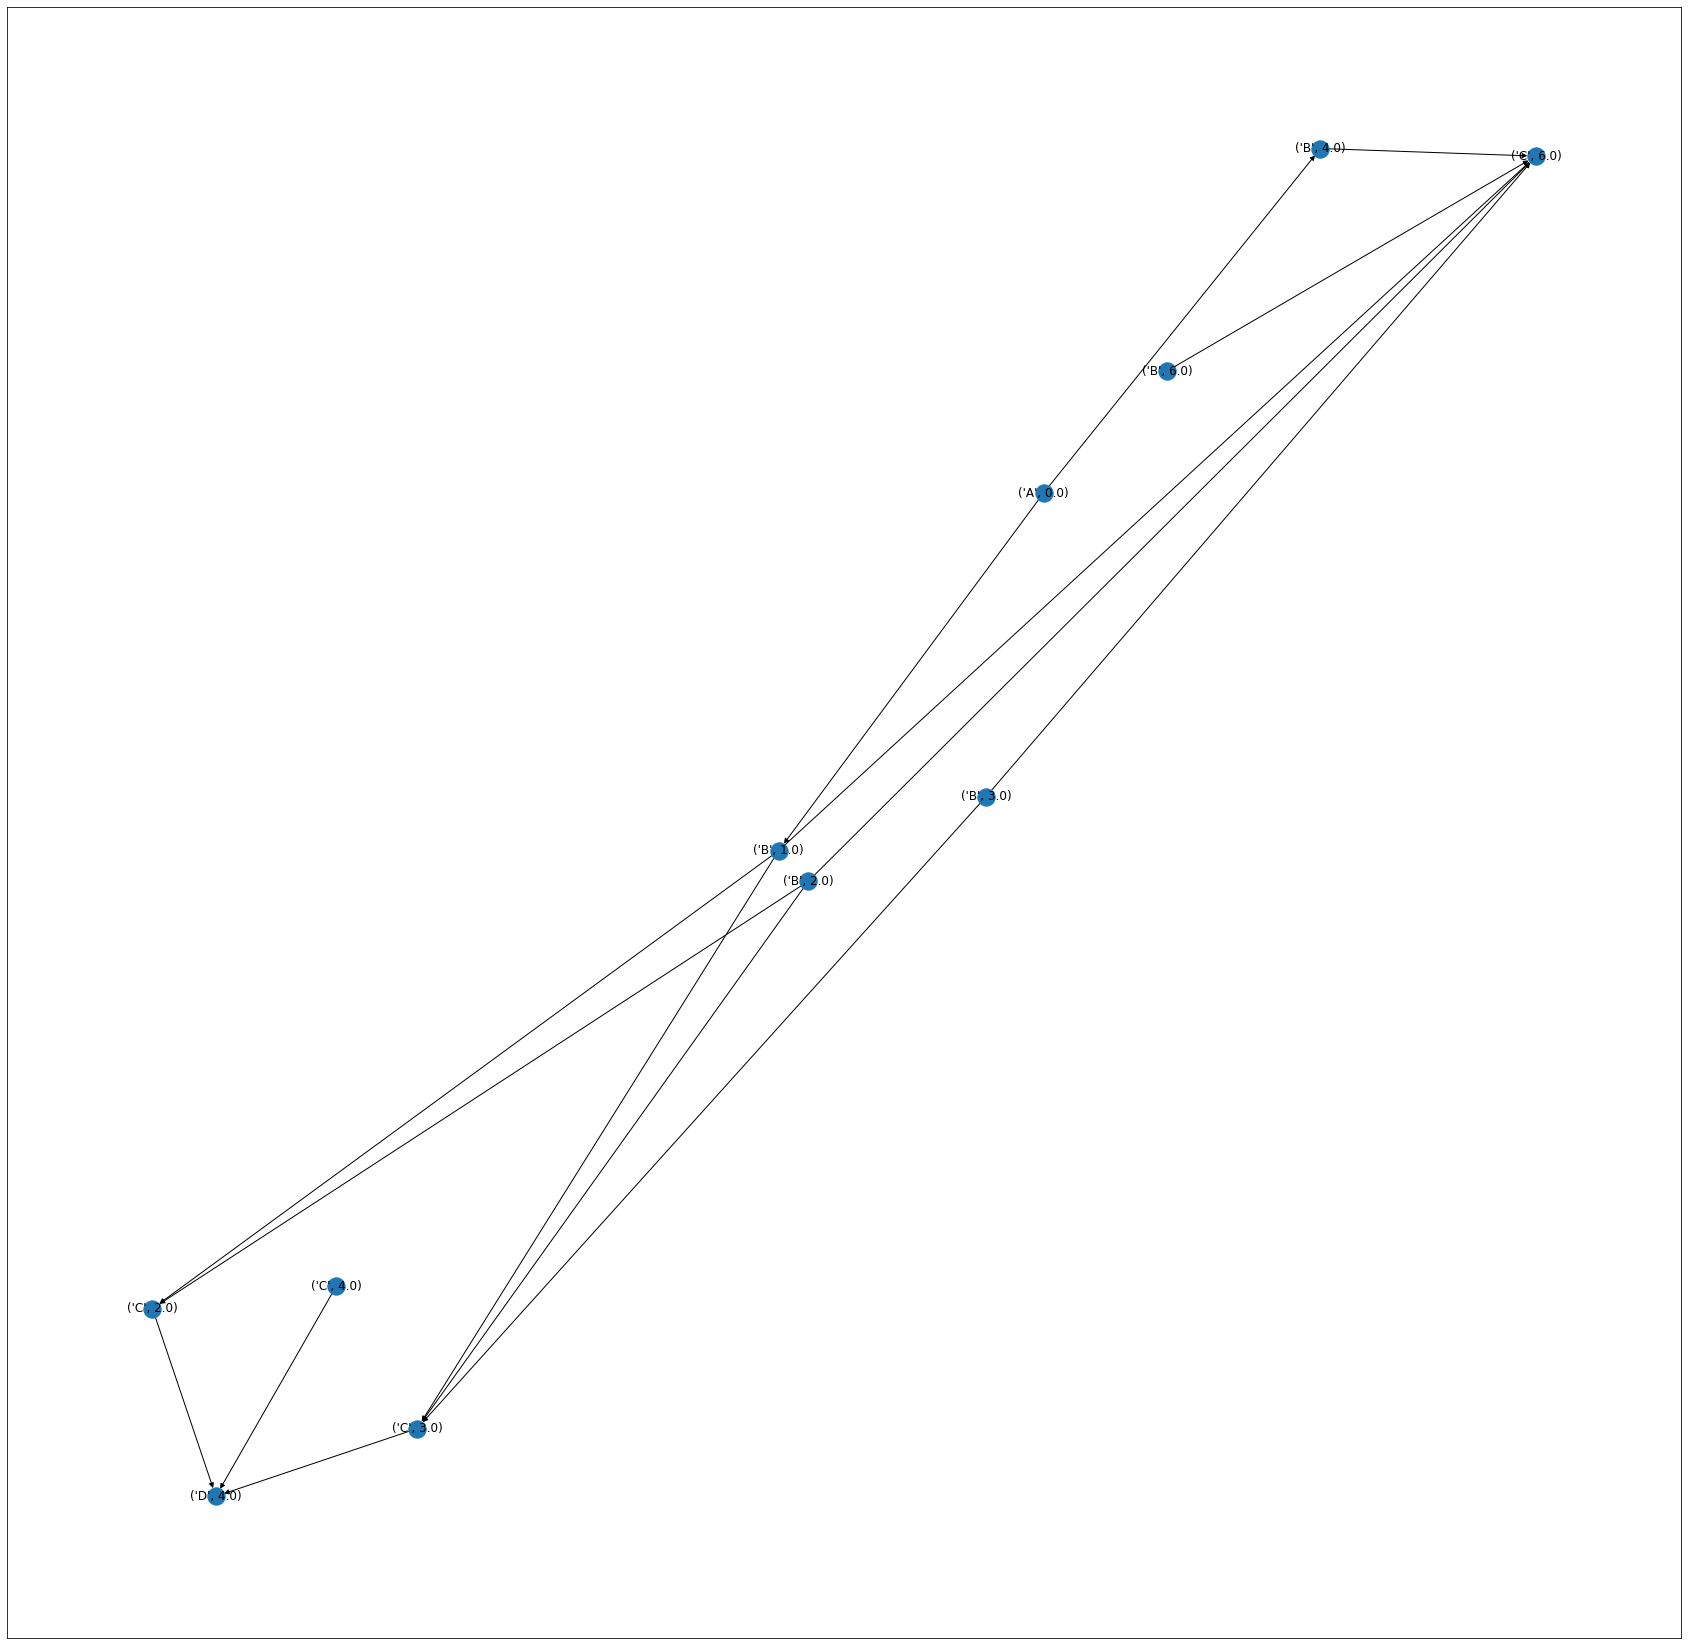

In [12]:
import networkx as nx
GD = G.graph
ren = dict()
for e in GD.nodes:
    ren[e] = (S.node_to_label[e[0]],e[1])
#print(ren)
GN =  nx.relabel_nodes(GD, ren, copy=True)
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

In [13]:
inf_scc = set()
scc = nx.kosaraju_strongly_connected_components(G.graph)
for s in scc:
    if len(s) > 1:
        inf_scc.add(s)

In [14]:
H = nx.condensation(G.graph)
res = set()
for s in inf_scc:
    for e in nx.bfs_edges(H, s):
        inf_scc.add(e)

In [15]:
temp_inf = set()
for s in inf_scc:
    for v in s:
        temp_inf.add(v)
for v in temp_inf:
    G.remove_node(v)

In [16]:
temp_inf

set()

In [17]:
clos_inf = bt.infinite_closure(s, G, events, events_reverse, temp_inf, opt_walk, cur_best, mw.Metawalk.co_short, len(S.nodes))

In [18]:
node_inf = temp_inf.union(clos_inf)

In [19]:
sigma = bt.volume_metapaths_at_dis_gen(G, node)
sigma_r = bt.optimal_with_resting_dis_gen(S, node, events, G, sigma, cur_best, unt, node_inf, opt_walk, mw.Metawalk.co_short, len(S.nodes))

In [20]:
sigma

{(0, 0.0): 0,
 (1, 1.0): 1,
 (1, 4.0): 1,
 (1, 2.0): 0,
 (1, 3.0): 0,
 (1, 6.0): 0,
 (2, 6.0): 2,
 (2, 2.0): 1,
 (2, 3.0): 1,
 (2, 4.0): 0,
 (3, 4.0): 2}

In [21]:
sigma_r

{(0, 0.0): 1.0,
 (0, 1.0): 1.0,
 (0, 2.0): 1.0,
 (0, 2.5): 1.0,
 (0, 3.0): 1.0,
 (0, 4.0): 1.0,
 (0, 6.0): 1.0,
 (1, 0.0): 0.0,
 (1, 1.0): 1,
 (1, 2.0): 1,
 (1, 2.5): 1,
 (1, 3.0): 1,
 (1, 4.0): 2,
 (1, 6.0): 2,
 (2, 0.0): 0.0,
 (2, 1.0): 0.0,
 (2, 2.0): 1,
 (2, 2.5): 1,
 (2, 3.0): 2,
 (2, 4.0): 2,
 (2, 6.0): 4,
 (3, 0.0): 0.0,
 (3, 1.0): 0.0,
 (3, 2.0): 0.0,
 (3, 2.5): 0.0,
 (3, 3.0): 0.0,
 (3, 4.0): 2,
 (3, 6.0): 2,
 (4, 0.0): 0.0,
 (4, 1.0): 0.0,
 (4, 2.0): 0.0,
 (4, 2.5): 0.0,
 (4, 3.0): 0.0,
 (4, 4.0): 0.0,
 (4, 6.0): 0.0}

In [22]:
min_values = { i:min(cur_best[i].values())   for i in S.nodes}

In [23]:
min_values

{0: 0, 1: 1, 2: 2, 3: 3, 4: inf}

In [24]:
sigma_dic = dict()
for (v,t) in sigma:
    if v not in sigma_dic:
        sigma_dic[v] = dict()
    sigma_dic[v][t] = sigma[(v,t)]

In [25]:
sigma_dic

{0: {0.0: 0},
 1: {1.0: 1, 4.0: 1, 2.0: 0, 3.0: 0, 6.0: 0},
 2: {6.0: 2, 2.0: 1, 3.0: 1, 4.0: 0},
 3: {4.0: 2}}

In [26]:
sigma_tot = { i : sum( sigma_dic[i][t] for t in sigma_dic[i].keys() if i in min_values and cur_best[i][t] == min_values[i]) for i in S.nodes if i != node and i in sigma_dic}

In [27]:
sigma_tot

{1: 2, 2: 4, 3: 2}

In [28]:
deltasvvt = bt.dictionary_svvt_dis_gen(G, node, sigma_r,min_values, cur_best, sigma_tot)

In [29]:
deltasvvt

{(0, 0.0): 0.0,
 (1, 1.0): 0.5,
 (1, 4.0): 1.0,
 (2, 2.0): 0.25,
 (1, 2.0): 0.5,
 (2, 3.0): 0.5,
 (1, 3.0): 0.5,
 (2, 6.0): 1.0,
 (1, 6.0): 1.0,
 (3, 4.0): 1.0,
 (2, 4.0): 0.5}

In [30]:
preced = bt.preced_node(S, G,events,events_reverse)

In [32]:
preced[0]

{0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0}

In [33]:
contribution = bt.general_contribution_from_node_dis_gen(S, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, unt, preced)

v, t, w, t_p, l_nei, partial_sum 0 0.0 1 4.0 {(0, 0.0): [[1.0, [1]], [4.0, [1]]], (1, 1.0): [[2.0, [2]], [3.0, [2]], [6.0, [2]]], (1, 4.0): [[6.0, [2]]], (2, 2.0): [[4.0, [3]]], (1, 2.0): [[2.0, [2]], [3.0, [2]], [6.0, [2]]], (2, 3.0): [[4.0, [3]]], (1, 3.0): [[3.0, [2]], [6.0, [2]]], (2, 6.0): [], (1, 6.0): [[6.0, [2]]], (3, 4.0): [], (2, 4.0): [[4.0, [3]]]} {4.0: 0.75}
event[jjj] 2.0
contribution[v] {}
ici
event[jjj] 2.5
contribution[v] {}
ici
event[jjj] 3.0
contribution[v] {}
ici
event[jjj] 4.0
contribution[v] {}
ici
contrib_local {0: {2.0: 0.75, 2.5: 0.75, 3.0: 0.75, 4.0: 0.75}}
v, t, w, t_p, l_nei, partial_sum 0 0.0 1 1.0 {(0, 0.0): [[1.0, [1]], [4.0, [1]]], (1, 1.0): [[2.0, [2]], [3.0, [2]], [6.0, [2]]], (1, 4.0): [[6.0, [2]]], (2, 2.0): [[4.0, [3]]], (1, 2.0): [[2.0, [2]], [3.0, [2]], [6.0, [2]]], (2, 3.0): [[4.0, [3]]], (1, 3.0): [[3.0, [2]], [6.0, [2]]], (2, 6.0): [], (1, 6.0): [[6.0, [2]]], (3, 4.0): [], (2, 4.0): [[4.0, [3]]]} {4.0: 0.75, 1.0: 3.0}
event[jjj] 1.0
contributio

In [34]:
contribution

{3: {4.0: 1.0, 0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 6.0: 0.0},
 2: {4.0: 1.5, 6.0: 1.0, 3.0: 1.5, 2.5: 0.5, 2.0: 0.75, 0.0: 0.0, 1.0: 0.0},
 1: {6.0: 1.5, 3.0: 1.5, 2.5: 1.0, 2.0: 2.25, 4.0: 1.5, 1.0: 2.25, 0.0: 0.0},
 0: {2.0: 0.75, 2.5: 0.75, 3.0: 0.75, 4.0: 0.75, 1.0: 3.0, 0.0: 3.0, 6.0: 0.0},
 4: {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0}}